# imports:

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *

#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold

import os
from Utils import cacheOnDisk
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done
done
done


/usr/wisdom/python/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate


'11062018'

# generate MPA tables - not filtered

1. species - not filtered 
2. genus - not filtered
3. species - filtered
4. genus - filtered

currently all are capped to 0.0001. RA data is trimmed and loged. 

## genus, not filtered

In [ ]:
# parameters to change:
#general parameters:
DFtype='Mb'
genDF=True #False=generate new df
toBinary=True

#basic prameters for generating df:
mbLevel='g'
useShortName=False

datasetFolder='%s/TCR_real_data/SubSampled15000data_rep2' %MyPath
datasetName='PNP515_ss15000_rep2'

#parameters for manipulations on df 
minVal=0.0001    #minVal can be None,0, float, or 'dfMinVal' or dfMinVal2:
minSharedT=None #minimal number of samples shared by seq/species required to leave sample in the database (int or None)
percShared=None #minimal number of samples shared by seq/species required to leave sample in the database (int [ percentage]
                #or None)
removeOutliers=True
normData=True
logTransform=True




#constant parameters:
minNshared=2
onlyProductive=True

mbDataFolder='AllSeqProjects'
#load PNP515 sample list:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP515','rb') as fp:
    PNP515=pickle.load(fp)

PNPsamples=['BD%s' %x for x in range(1,950)]
SampleList=PNP515
SampleListName='PNP515'
libPrepMethod=None
filterGenotek=None
filterMinimalReads=None
filterlibPrepMethod=libPrepMethod
groupFunction='noOutlierMean'
nSTD=5
nMinSamples=3
ignoreNotSameYear=True
removeSamePerson=False




In [ ]:
df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                 minVal,minSharedT,percShared,
                                 mbLevel,useShortName,datasetFolder,datasetName,
                                minNshared,onlyProductive,mbDataFolder,SampleList,SampleListName,filterlibPrepMethod,
                                 filterGenotek, groupFunction, nSTD,nMinSamples,ignoreNotSameYear,removeSamePerson)


## species, not filtered

In [ ]:
mbLevel='s'
df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                 minVal,minSharedT,percShared,
                                 mbLevel,useShortName,datasetFolder,datasetName,
                                minNshared,onlyProductive,mbDataFolder,SampleList,SampleListName,filterlibPrepMethod,
                                 filterGenotek, groupFunction, nSTD,nMinSamples,ignoreNotSameYear,removeSamePerson)


## genus, filtered

In [ ]:
mbLevel='g'
filterGenotek=True
filterMinimalReads=9000000
useShortName=False
df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                 minVal,minSharedT,percShared,
                                 mbLevel,useShortName,datasetFolder,datasetName,
                                minNshared,onlyProductive,mbDataFolder,SampleList,SampleListName,filterlibPrepMethod,
                                 filterGenotek, filterMinimalReads,groupFunction, nSTD,nMinSamples,ignoreNotSameYear,removeSamePerson)


## species, not filtered

In [ ]:
mbLevel='s'
filterGenotek=True
filterMinimalReads=9000000
useShortName=False
df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                 minVal,minSharedT,percShared,
                                 mbLevel,useShortName,datasetFolder,datasetName,
                                minNshared,onlyProductive,mbDataFolder,SampleList,SampleListName,filterlibPrepMethod,
                                 filterGenotek, filterMinimalReads,groupFunction, nSTD,nMinSamples,ignoreNotSameYear,removeSamePerson)


# generate diversity features:

In [ ]:
the function calcMBclonDivFeaturesPerMPAtable was copied to TCR_microbiome_interactions_functions2

loading relevant MPA table:
       Abiotrophia  Acidaminococcaceae_unclassified  Acidaminococcus  \
BD                                                                     
BD1         0.0001                         0.000100         0.000100   
BD10        0.0001                         0.001966         0.056999   
BD101       0.0001                         0.000100         0.000850   
BD105       0.0001                         0.000100         0.040466   
BD106       0.0001                         0.000100         0.000100   

       Acidobacteriaceae_unclassified  Acinetobacter  
BD                                                    
BD1                            0.0001         0.0001  
BD10                           0.0001         0.0001  
BD101                          0.0001         0.0001  
BD105                          0.0001         0.0001  
BD106                          0.0001         0.0001  
generating MBclonDivFeatures...
MBclonDivFeatures table shape is 432_13
removing o

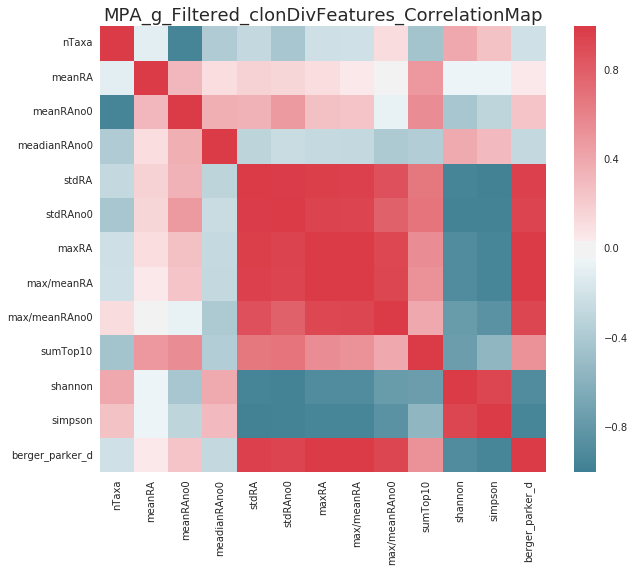

loading relevant MPA table:
       Abiotrophia_defectiva  Acidaminococcus_fermentans  \
BD                                                         
BD1                   0.0001                      0.0001   
BD10                  0.0001                      0.0001   
BD101                 0.0001                      0.0001   
BD105                 0.0001                      0.0001   
BD106                 0.0001                      0.0001   

       Acidaminococcus_intestini  Acidaminococcus_sp_BV3L6  \
BD                                                           
BD1                       0.0001                    0.0001   
BD10                      0.0001                    0.0001   
BD101                     0.0001                    0.0001   
BD105                     0.0001                    0.0001   
BD106                     0.0001                    0.0001   

       Acidaminococcus_sp_D21  
BD                             
BD1                    0.0001  
BD10                

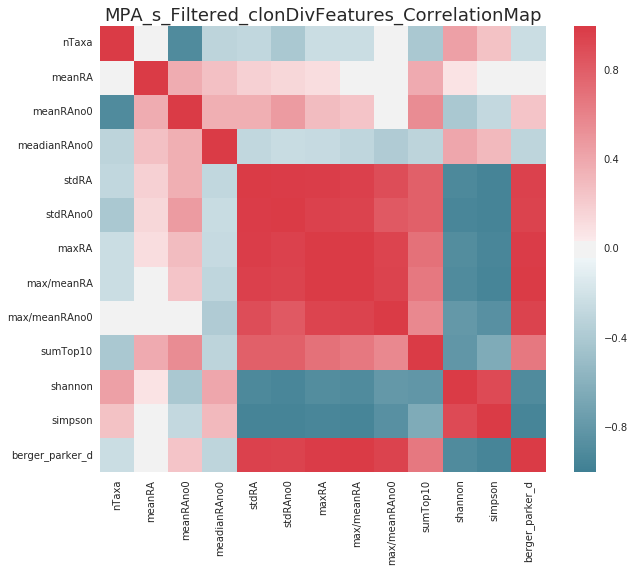

loading relevant MPA table:
       Abiotrophia  Acidaminococcaceae_unclassified  Acidaminococcus  \
BD                                                                     
BD1         0.0001                         0.000100         0.000100   
BD10        0.0001                         0.002385         0.047815   
BD101       0.0001                         0.000100         0.000850   
BD105       0.0001                         0.000689         0.031372   
BD106       0.0001                         0.000100         0.000100   

       Acidobacteriaceae_unclassified  Acinetobacter  
BD                                                    
BD1                            0.0001         0.0001  
BD10                           0.0001         0.0001  
BD101                          0.0001         0.0001  
BD105                          0.0001         0.0001  
BD106                          0.0001         0.0001  
generating MBclonDivFeatures...
MBclonDivFeatures table shape is 490_13
removing o

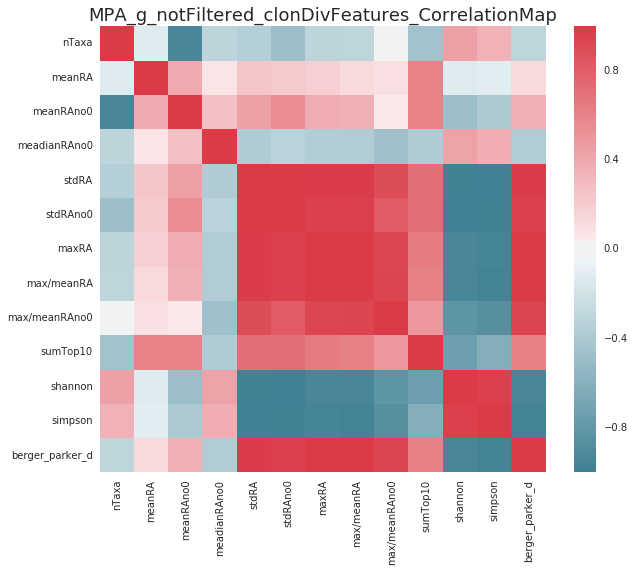

loading relevant MPA table:
       Abiotrophia_defectiva  Acidaminococcus_fermentans  \
BD                                                         
BD1                   0.0001                      0.0001   
BD10                  0.0001                      0.0001   
BD101                 0.0001                      0.0001   
BD105                 0.0001                      0.0001   
BD106                 0.0001                      0.0001   

       Acidaminococcus_intestini  Acidaminococcus_sp_BV3L6  \
BD                                                           
BD1                       0.0001                    0.0001   
BD10                      0.0001                    0.0001   
BD101                     0.0001                    0.0001   
BD105                     0.0001                    0.0001   
BD106                     0.0001                    0.0001   

       Acidaminococcus_sp_D21  
BD                             
BD1                    0.0001  
BD10                

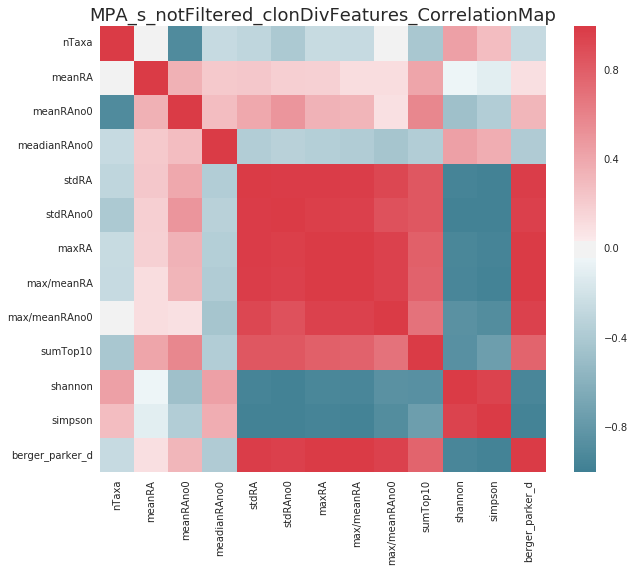

In [3]:
MPAtableList=['MPA_g_Filtered','MPA_s_Filtered','MPA_g_notFiltered','MPA_s_notFiltered']

for MPAtableName in MPAtableList:
    c=calcMBclonDivFeaturesPerMPAtable(MPAtableName,removeOutliers=True)


# merge features:

# merge all filtered features:

In [10]:
folder='%s/MicrobiomeDataTables/MbFeatureTables' %MyPath
filenames = [f for f in listdir(folder) if isfile(join(folder, f))]

for tabType in ['Filtered','notFiltered']:
    print tabType
    feature_tables=[x for x in filenames if '_%s' %tabType in x]
    print feature_tables


    for n,table in enumerate(feature_tables):
        print n
        file1='%s/%s' %(folder,table)
        df=pd.read_pickle(file1)

        suffix=table.replace('_','')
        suffix=suffix.replace(tabType,'')
        suffix=suffix.replace('removeOLTrue','')
        suffix=suffix.replace('MB','')

        for column in df.columns.values:
            df=df.rename(columns={column:column+'_'+suffix})
        if n==0:
            mergedFeatureTable=df.copy()
        else:
            mergedFeatureTable=pd.merge(mergedFeatureTable,df,how='outer',left_index=True,right_index=True)
        print 'merged df length is %s' %len(mergedFeatureTable)
        
    print mergedFeatureTable.shape
    print mergedFeatureTable.head()
    
    file2='%s/%s_mergedFeatureTable' %(folder,tabType)
    mergedFeatureTable.to_pickle(file2)
    
    file3='%s/%s_mergedFeatureTable.xlsx' %(folder,tabType)
    mergedFeatureTable.to_excel(file3)
    




Filtered
['MPA_s_Filtered_MBclonDivFeatures_removeOLTrue', 'MPA_s_Filtered_binary', 'MPA_s_Filtered', 'MPA_g_Filtered_MBclonDivFeatures_removeOLTrue', 'MPA_g_Filtered', 'MPA_g_Filtered_binary']
0
merged df length is 432
1
merged df length is 432
2
merged df length is 432
3
merged df length is 432
4
merged df length is 432
5
merged df length is 432
(432, 2316)
       nTaxa_MPAsclonDivFeatures  meanRA_MPAsclonDivFeatures  \
BD                                                             
BD1                         78.0                    0.001223   
BD10                        64.0                    0.001087   
BD101                       76.0                    0.001214   
BD105                       77.0                    0.001217   
BD106                       54.0                    0.001247   

       meanRAno0_MPAsclonDivFeatures  meadianRAno0_MPAsclonDivFeatures  \
BD                                                                       
BD1                         0.012581     

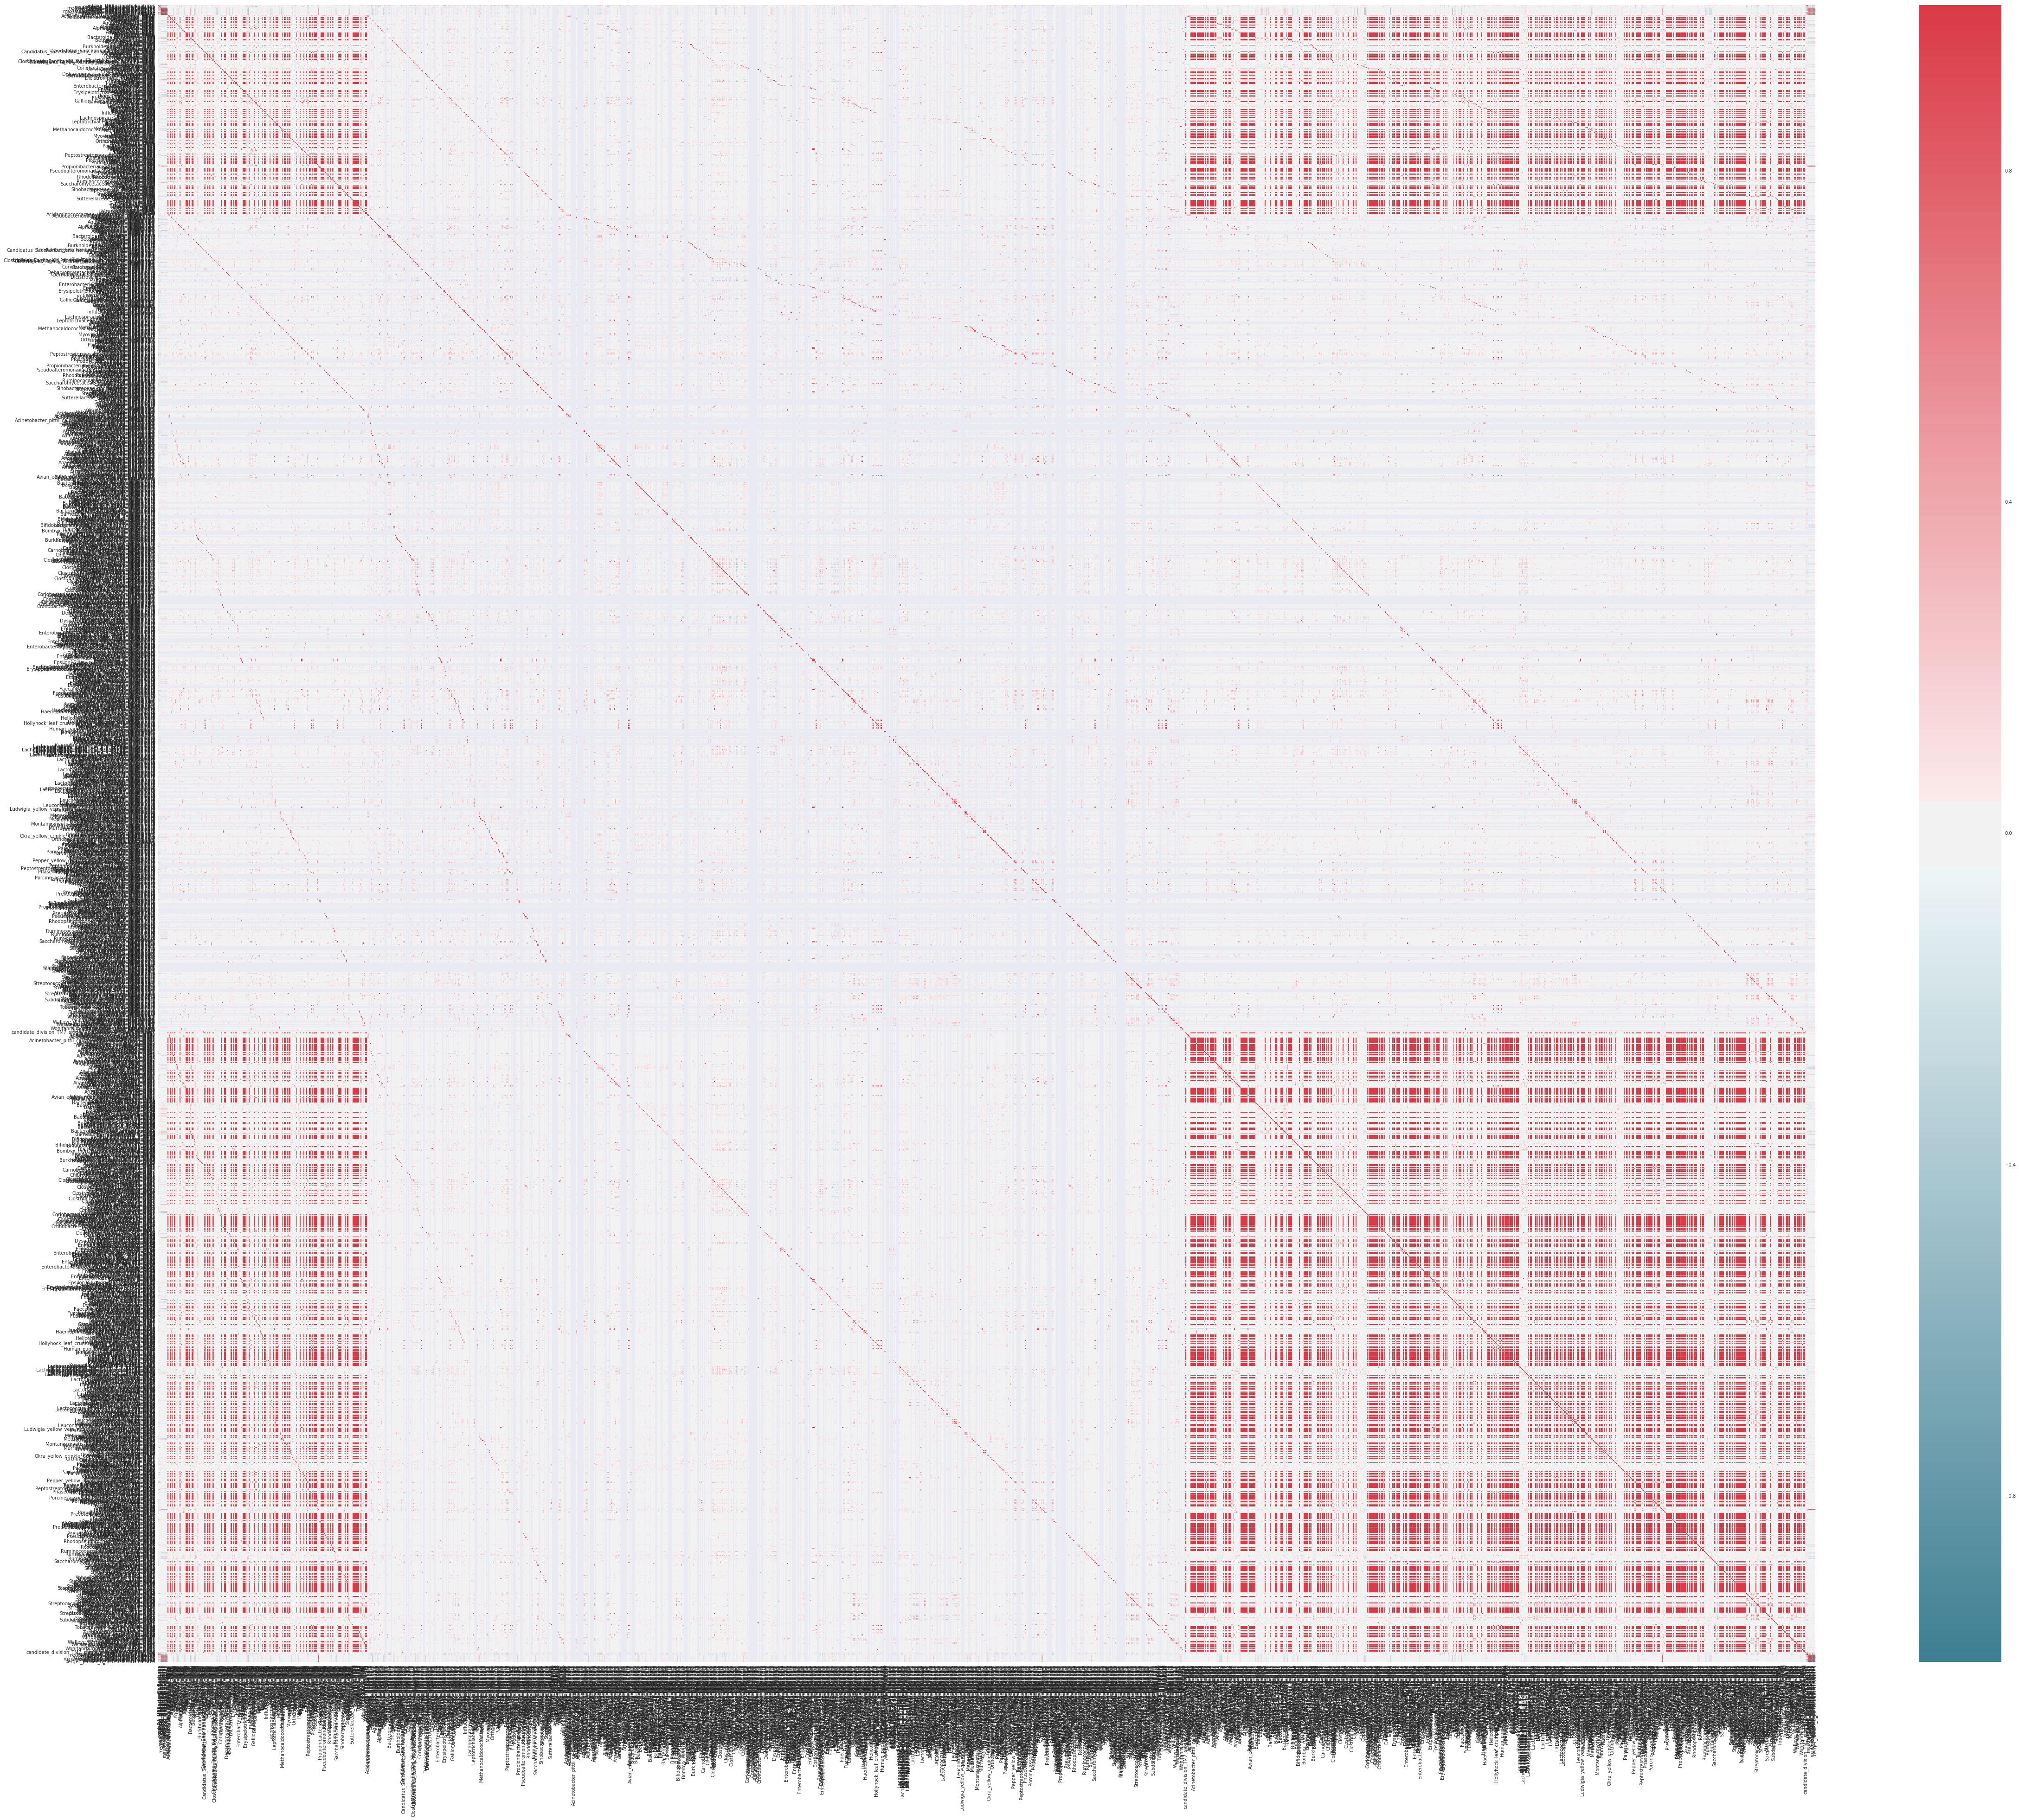

In [13]:
f, ax = plt.subplots(figsize=(80, 64))
corr = mergedFeatureTable.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
# ax.set_title('%s_clonDivFeatures_CorrelationMap' %MPAtableName,fontsize=18)
plt.show()

In [12]:
corr

nTaxa_MPAgclonDivFeatures  \
nTaxa_MPAgclonDivFeatures                                        1.000000e+00   
meanRA_MPAgclonDivFeatures                                      -1.224054e-01   
meanRAno0_MPAgclonDivFeatures                                   -9.426685e-01   
meadianRAno0_MPAgclonDivFeatures                                -3.124862e-01   
stdRA_MPAgclonDivFeatures                                       -3.562598e-01   
stdRAno0_MPAgclonDivFeatures                                    -4.795872e-01   
maxRA_MPAgclonDivFeatures                                       -3.062666e-01   
max/meanRA_MPAgclonDivFeatures                                  -3.011221e-01   
max/meanRAno0_MPAgclonDivFeatures                                1.404844e-02   
sumTop10_MPAgclonDivFeatures                                    -4.465790e-01   
shannon_MPAgclonDivFeatures                                      4.422680e-01   
simpson_MPAgclonDivFeatures                                      3.463897e-01   
berger_parker_d_MPAgclonDivFeatures                             -3.013002e-01   
Abiotrophia_MPAg                                                -2.398182e-16   
Acidaminococcaceae_unclassified_MPAg                             8.587305e-02   
Acidaminococcus_MPAg                                             1.251005e-01   
Acidobacteriaceae_unclassified_MPAg                             -2.398182e-16   
Acinetobacter_MPAg                                              -2.398182e-16   
Actinobacillus_MPAg                                              8.613019e-02   
Actinobaculum_MPAg                                              -2.398182e-16   
Actinomyces_MPAg                                                 2.493311e-01   
Adlercreutzia_MPAg                                               4.940645e-02   
Aerococcus_MPAg                                                 -2.398182e-16   
Aeromonas_MPAg                                                  -2.398182e-16   
Aggregatibacter_MPAg                                             9.037223e-02   
Akkermansia_MPAg                                                 1.846699e-01   
Alistipes_MPAg                                                   9.200626e-02   
Allobaculum_MPAg                                                -2.398182e-16   
Alloprevotella_MPAg                                             -5.132549e-02   
Alloscardovia_MPAg                                               1.341115e-01   
...                                                                       ...   
Veillonella_unclassified_MPAs                                    1.126805e-01   
Vibrio_cholerae_MPAs                                            -2.398182e-16   
Walleye_dermal_sarcoma_virus_MPAs                               -2.398182e-16   
Weissella_cibaria_MPAs                                           1.164881e-01   
Weissella_confusa_MPAs                                           1.046283e-01   
Weissella_paramesenteroides_MPAs                                -2.398182e-16   
Weissella_phage_phiYS61_MPAs                                    -2.398182e-16   
Weissella_unclassified_MPAs                                      1.032847e-01   
Wesselsbron_virus_MPAs                                          -2.398182e-16   
West_Nile_virus_MPAs                                            -2.398182e-16   
Wheat_dwarf_virus_MPAs                                           9.789992e-03   
Wohlfahrtiimonas_chitiniclastica_MPAs                           -2.398182e-16   
Yellow_fever_virus_MPAs                                          2.156234e-03   
Yersinia_phage_L_413C_MPAs                                       1.449339e-01   
Yersinia_unclassified_MPAs                                      -2.398182e-16   
Yokose_virus_MPAs                                               -2.398182e-16   
candidate_division_TM7_single_cell_isolate_TM7c...              -4.543631e-02   
nTaxa_MPAsclonDivFeatures                                        8.425116e-01   
me

# get subsets of the feature tables:

## binary genus+species:

In [ ]:
folder='%s/MicrobiomeDataTables/MbFeatureTables' %MyPath
filenames = [f for f in listdir(folder) if isfile(join(folder, f))]

for tabType in ['Filtered','notFiltered']:
    for dataType in ['B']
    print tabType
    feature_tables=[x for x in filenames if '_%s' %tabType in x]
    print feature_tables


    for n,table in enumerate(feature_tables):
        print n
        file1='%s/%s' %(folder,table)
        df=pd.read_pickle(file1)

        suffix=table.replace('_','')
        suffix=suffix.replace(tabType,'')
        suffix=suffix.replace('removeOLTrue','')
        suffix=suffix.replace('MB','')

        for column in df.columns.values:
            df=df.rename(columns={column:column+'_'+suffix})
        if n==0:
            mergedFeatureTable=df.copy()
        else:
            mergedFeatureTable=pd.merge(mergedFeatureTable,df,how='outer',left_index=True,right_index=True)
        print 'merged df length is %s' %len(mergedFeatureTable)
        
    print mergedFeatureTable.shape
    print mergedFeatureTable.head()
    
    file2='%s/%s_mergedFeatureTable' %(folder,tabType)
    mergedFeatureTable.to_pickle(file2)
    
    file3='%s/%s_mergedFeatureTable.xlsx' %(folder,tabType)
    mergedFeatureTable.to_excel(file3)
